In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_spd_matrix


In [2]:
def generate_cosine_data(m=100, d=3, noise=0.01):
    """
    Generates data on the sphere in R^d with labels y = cos(<x, u>) + noise

    Returns:
        X: data points on the sphere
        y: target values using cosine of dot product
        u: the true vector
    """
    X = np.random.randn(m, d)
    X /= np.linalg.norm(X, axis=1, keepdims=True)  

    u = np.random.randn(d)
    u /= np.linalg.norm(u)

    y = np.cos(X @ u) + np.random.normal(0, noise, size=m)
    
    return X, y, u

In [3]:
def generate_training_data_unfixed(m=100, n=2, noise=0.01):
    """
    Generates synthetic training data:
    - x_i ~ N(2,1)
    - y_i = Ax_i + b + noise
    """
    
    X = np.random.normal(loc=2, scale=1, size=(m, n))
    A = np.random.normal(0, 1, size=(n,)) 
    b = np.random.normal(0, 1)
    eta_i = np.random.normal(0, noise, size=(m,))
    y = X @ A + b + eta_i
    true_coefficients = {'A': A, 'b': b}
    return X, y, true_coefficients

In [4]:
def generate_training_data_fixed(m=100, n=2, noise=0.01, model_type='linear', nonlinear_func=None):
    """
    Generates synthetic training data with fixed A and b coefficients for linear regression, polynomial regression, and nonlinear cases.
    """
    X = np.random.normal(loc=2, scale=1, size=(m, n))
    if model_type == 'linear':
        A = np.array([1.0, 2.0])[:n]  
        b = 1.0                       
        eta_i = np.random.normal(0, noise, size=(m,))
        y = X @ A + b + eta_i
        true_coefficients = {'A': A, 'b': b}
        print(true_coefficients)
        
    elif model_type == 'polynomial':
        A_poly = np.array([1.0, 0.5, 0.3, 0.2])
        b = 1.0
        eta_i = np.random.normal(0, noise, size=(m,))
        X_poly = np.hstack([X, X**2])  
        y = X_poly @ A_poly + b + eta_i
        true_coefficients = {'A': A_poly, 'b': b}
        X = X_poly
    
    elif model_type == 'nonlinear':
        b = 1.0
        eta_i = np.random.normal(0, noise, size=(m,))
        y = nonlinear_func(X[:, 0]) + b + eta_i
        true_coefficients = {'function': nonlinear_func.__name__, 'b': b}
    
    return X, y, true_coefficients
    

In [6]:
X, y, true_params = generate_training_data_unfixed(m=100, n=2, noise=0.1)
sgd = SGD(X, y, num_iterations=5000)


w_fixed, obj_fixed, grad_fixed, dist_fixed = sgd.optimize(stepsize_type='fixed')
w_halving, obj_halving, grad_halving, dist_halving = sgd.optimize(stepsize_type='halving')
w_diminishing, obj_diminishing, grad_diminishing, dist_diminishing = sgd.optimize(stepsize_type='diminishing')

print("True parameters:")
print(f"A: {true_params['A']}, b: {true_params['b']}")
print(f"Learned parameters (fixed step size): w_0 (bias) = {w_fixed[0]:.4f}, w_1 = {w_fixed[1]:.4f}, w_2 = {w_fixed[2]:.4f}")
print(f"Final Loss: {obj_fixed[-1]:.4f}")
print(f"Learned parameters (halving step size): w_0 (bias) = {w_halving[0]:.4f}, w_1 = {w_halving[1]:.4f}, w_2 = {w_halving[2]:.4f}")
print(f"Final Loss: {obj_halving[-1]:.4f}")
print(f"Learned parameters (diminishing step size): w_0 (bias) = {w_diminishing[0]:.4f}, w_1 = {w_diminishing[1]:.4f}, w_2 = {w_diminishing[2]:.4f}")
print(f"Final Loss: {obj_diminishing[-1]:.4f}")
# plot (4.21) multiply k, should converge to a constant or stabilize

Parameters: L = 10.15472703538621, c = 0.12906695164629295, M_V = 63.23826255893613, mu = 1, mu_G = 1, M_G = 64.23826255893613, M = 1.122496285407212e-05 
 Fixed Stepsize: alpha_bar = 0.0015329851929264603
Diminishing Stepsize Parameters: beta = 7.7494, gamma = 5054.1367
True parameters:
A: [-0.82181796 -0.39524791], b: 0.5803406526530233
Learned parameters (fixed step size): w_0 (bias) = 0.2708, w_1 = -0.7438, w_2 = -0.3411
Final Loss: 0.0108
Learned parameters (halving step size): w_0 (bias) = 0.2776, w_1 = -0.7409, w_2 = -0.3362
Final Loss: 0.0107
Learned parameters (diminishing step size): w_0 (bias) = 0.1892, w_1 = -0.7271, w_2 = -0.3116
Final Loss: 0.0146


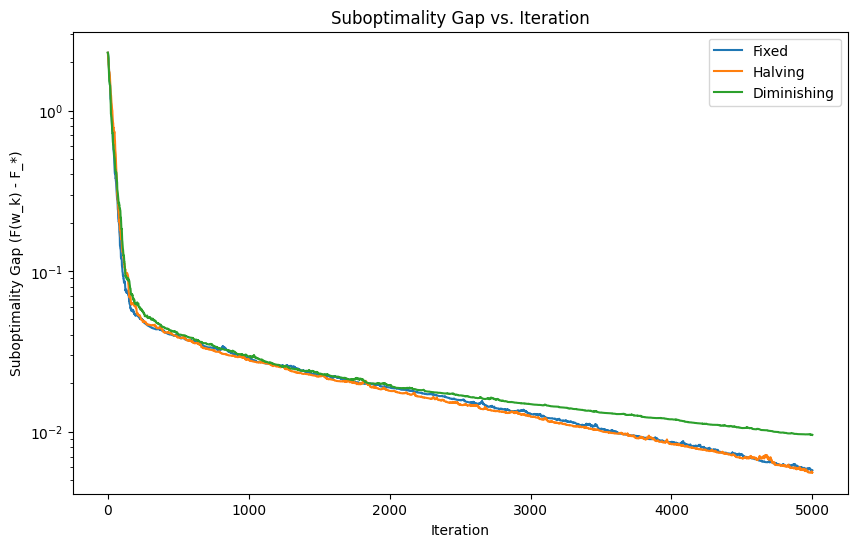

In [7]:
# Plotting the suboptimality gap

plt.figure(figsize=(10, 6))
plt.plot(obj_fixed - sgd.F_star, label='Fixed')
plt.plot(obj_halving - sgd.F_star, label='Halving')
plt.plot(obj_diminishing - sgd.F_star, label='Diminishing')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Suboptimality Gap (F(w_k) - F_*)')
plt.legend()
plt.title('Suboptimality Gap vs. Iteration')
plt.show()

In [8]:

X, y, u_true = generate_cosine_data(m=100, d=3, noise=0.01)
degrees = [1,2,3,4,5]
for degree in degrees:
    sgd = SGD(X, y, num_iterations=5000, degree=degree, noise=0.01)
    w_fixed, obj_fixed, grad_fixed, dist_fixed = sgd.optimize(stepsize_type='fixed')
    w_halving, obj_halving, grad_halving, dist_halving = sgd.optimize(stepsize_type='halving')
    w_diminishing, obj_diminishing, grad_diminishing, dist_diminishing = sgd.optimize(stepsize_type='diminishing')
    
    print(f"True parameters: {true_params}")
    print(f"\nLearned parameters with degree-{degree} polynomial features:\n")
    print(f"[Fixed]      w_0 (bias) = {w_fixed[0]:.4f}, rest = {w_fixed[1:]}")
    print(f"Final Loss: {obj_fixed[-1]:.4f}")
    print(f"[Halving]    w_0 (bias) = {w_halving[0]:.4f}, rest = {w_halving[1:]}")
    print(f"Final Loss: {obj_halving[-1]:.4f}")
    print(f"[Diminishing]w_0 (bias) = {w_diminishing[0]:.4f}, rest = {w_diminishing[1:]}")
    print(f"Final Loss: {obj_diminishing[-1]:.4f}")
    print("\n" + "="*50 + "\n")

Parameters: L = 1.01192586781293, c = 0.23482032148046397, M_V = 0.7340310127475681, mu = 1, mu_G = 1, M_G = 1.7340310127475682, M = 0.0002 
 Fixed Stepsize: alpha_bar = 0.5698944684743202
halving stepsize to 0.2849472342
halving stepsize to 0.1424736171
halving stepsize to 0.0712368086
halving stepsize to 0.0356184043
Diminishing Stepsize Parameters: beta = 4.8285, gamma = 7.4726
True parameters: {'A': array([-0.82181796, -0.39524791]), 'b': 0.5803406526530233}

Learned parameters with degree-1 polynomial features:

[Fixed]      w_0 (bias) = 0.9146, rest = [ 0.02701855 -0.03182059  0.06021482]
Final Loss: 0.0098
[Halving]    w_0 (bias) = 0.8526, rest = [-0.01618716  0.00867553  0.02635264]
Final Loss: 0.0077
[Diminishing]w_0 (bias) = 0.8544, rest = [0.00119781 0.01362844 0.03684471]
Final Loss: 0.0076


Parameters: L = 1.243108053870327, c = 1e-06, M_V = 4.7675209252688795, mu = 1, mu_G = 1, M_G = 5.7675209252688795, M = 0.00026214912682004664 
 Fixed Stepsize: alpha_bar = 0.139476789

In [9]:
X, y, true_params = generate_training_data_fixed(m=100, n=2, noise=0.01, model_type='nonlinear', nonlinear_func=np.cos)
degrees = [1,2,3,4,5]
for degree in degrees:
    sgd = SGD(X, y, num_iterations=5000, degree=degree, noise=0.01)
    w_fixed, obj_fixed, grad_fixed, dist_fixed = sgd.optimize(stepsize_type='fixed')
    w_halving, obj_halving, grad_halving, dist_halving = sgd.optimize(stepsize_type='halving')
    w_diminishing, obj_diminishing, grad_diminishing, dist_diminishing = sgd.optimize(stepsize_type='diminishing')
    
    print(f"True parameters: {true_params}")
    print(f"\nLearned parameters with degree-{degree} polynomial features:\n")
    print(f"[Fixed]      w_0 (bias) = {w_fixed[0]:.4f}, rest = {w_fixed[1:]}")
    print(f"Final Loss: {obj_fixed[-1]:.4f}")
    print(f"[Halving]    w_0 (bias) = {w_halving[0]:.4f}, rest = {w_halving[1:]}")
    print(f"Final Loss: {obj_halving[-1]:.4f}")
    print(f"[Diminishing]w_0 (bias) = {w_diminishing[0]:.4f}, rest = {w_diminishing[1:]}")
    print(f"Final Loss: {obj_diminishing[-1]:.4f}")
    print("\n" + "="*50 + "\n")

Parameters: L = 10.051459391404002, c = 0.09845886436935512, M_V = 206.5982687947819, mu = 1, mu_G = 1, M_G = 207.5982687947819, M = 0.0011156128379938247 
 Fixed Stepsize: alpha_bar = 0.0004792334790432814
Diminishing Stepsize Parameters: beta = 10.1570, gamma = 21193.2728
True parameters: {'function': 'cos', 'b': 1.0}

Learned parameters with degree-1 polynomial features:

[Fixed]      w_0 (bias) = 0.4604, rest = [-0.21668699  0.30781405]
Final Loss: 0.1559
[Halving]    w_0 (bias) = 0.4639, rest = [-0.21283053  0.30437258]
Final Loss: 0.1555
[Diminishing]w_0 (bias) = 0.4244, rest = [-0.19155234  0.30883208]
Final Loss: 0.1624


Parameters: L = 78.4476860567997, c = 0.02798306683571419, M_V = 26923.010336527226, mu = 1, mu_G = 1, M_G = 26924.010336527226, M = 0.010381711327269418 
 Fixed Stepsize: alpha_bar = 4.73456532943906e-07
Diminishing Stepsize Parameters: beta = 35.7359, gamma = 75478728.7137
True parameters: {'function': 'cos', 'b': 1.0}

Learned parameters with degree-2 polyn

In [10]:
# def run_experiments_with_fixed_parameters():
#     #stepsizes = [0.001, 0.01, 0.1]
#     num_steps = [100, 1000, 5000]
#     noise_levels = [0.01, 0.1, 1.0]
    
    
#     for j, n_steps in enumerate(num_steps):
#         for k, noise in enumerate(noise_levels):
#             X, y, true_params = generate_training_data_fixed(100, 2, noise, 'linear')
#             sgd = SGD(X, y, num_iterations=n_steps)
#             w, obj, grad, dist = sgd.optimize()
#             label = f"Steps={n_steps}, Noise={noise}"
#             print("Linear function:")
#             print(f"{label}, Final Loss: {obj[-1]:.4f}")
            
#     for j, n_steps in enumerate(num_steps):
#         for k, noise in enumerate(noise_levels):
#             X_poly, y_poly, true_params_poly = generate_training_data_fixed(100, 2, noise, 'polynomial')
#             sgd_poly = SGD(X_poly, y_poly, num_iterations=n_steps)
#             w_poly, obj_poly, grad_poly, dist_poly = sgd_poly.optimize()
#             label = f"Steps={n_steps}, Noise={noise}"
#             print("Polynomial function:")
#             print(f"{label}, Final Loss: {obj_poly[-1]:.4f}")
    
#     for j, n_steps in enumerate(num_steps):
#         for k, noise in enumerate(noise_levels):
#             X_nonlin, y_nonlin, true_params_nonlin = generate_training_data_fixed(
#             100, 1, noise, 'nonlinear', nonlinear_func=np.cos
#         )
#             sgd_nonlin = SGD(X_nonlin, y_nonlin, num_iterations=n_steps)
#             w_nonlin, obj_nonlin, grad_nonlin, dist_nonlin = sgd_nonlin.optimize()
#             label = f"Steps={n_steps}, Noise={noise}"
#             print("Nonlinear function")
#             print(f"{label}, Final Loss: {obj_nonlin[-1]:.4f}")


In [11]:
# run_experiments_with_fixed_parameters()

In [12]:
#plt.figure(figsize=(15, 9))
#plt.subplot(3, 1, 1)
#plt.plot(obj_fixed - sgd.F_star, label='Fixed Stepsize')
#plt.ylabel('$F(w) - F(w_*)$')
#plt.title('Objective Function Decrease')
#plt.legend()
#plt.yscale('log')

#plt.subplot(3, 1, 2)
#plt.plot(grad_fixed, label='Fixed Stepsize')
#plt.ylabel('$||F(w)||^2$')
#plt.title('Gradient Norm Squared')
#plt.legend()
#plt.yscale('log')

#plt.subplot(3, 1, 3)
#plt.plot(dist_fixed, label='Fixed Stepsize')
#plt.xlabel('Iteration')
#plt.ylabel('$||w_k - w_*||^2$')
#plt.title('Distance to Optimum')
#plt.legend()
#plt.yscale('log')

#plt.tight_layout()
#plt.show()